# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

city="Manila"
city_url = url+f"&q={city}"
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 120.9822, 'lat': 14.6042},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 301.6,
  'feels_like': 307.74,
  'temp_min': 300.92,
  'temp_max': 302.15,
  'pressure': 1010,
  'humidity': 87,
  'sea_level': 1010,
  'grnd_level': 1013},
 'visibility': 10000,
 'wind': {'speed': 1.54, 'deg': 180},
 'clouds': {'all': 40},
 'dt': 1728570828,
 'sys': {'type': 2,
  'id': 2008256,
  'country': 'PH',
  'sunrise': 1728510387,
  'sunset': 1728553163},
 'timezone': 28800,
 'id': 1701668,
 'name': 'Manila',
 'cod': 200}

In [7]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+f"&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | ceelbuur
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | petropavlovsk-kamchatsky
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | banjarmasin
Processing Record 8 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 9 of Set 1 | nar'yan-mar
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | vorkuta
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | ruyigi
Processing Record 14 of Set 1 | nemuro
Processing Record 15 of Set 1 | nagqu
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | aasiaat
Processing Record 21 of Set 1 | waitangi
Processing 

Processing Record 42 of Set 4 | noumea
Processing Record 43 of Set 4 | samus'
Processing Record 44 of Set 4 | al artawiyah
Processing Record 45 of Set 4 | birao
Processing Record 46 of Set 4 | fortuna foothills
Processing Record 47 of Set 4 | manismata
Processing Record 48 of Set 4 | long beach
Processing Record 49 of Set 4 | smithers
Processing Record 0 of Set 5 | niteroi
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | suntar
Processing Record 3 of Set 5 | longyearbyen
Processing Record 4 of Set 5 | kuala belait
Processing Record 5 of Set 5 | taunggyi
Processing Record 6 of Set 5 | meadow lake
Processing Record 7 of Set 5 | keflavik
Processing Record 8 of Set 5 | saint-philippe
Processing Record 9 of Set 5 | jaguey grande
Processing Record 10 of Set 5 | enewetak
Processing Record 11 of Set 5 | lebu
Processing Record 12 of Set 5 | fang
Processing Record 13 of Set 5 | bhimunipatnam
Processing Record 14 of Set 5 | grand-popo
Processing Record 15 of Set 5 | el haoua

Processing Record 32 of Set 8 | naduvattam
Processing Record 33 of Set 8 | byron bay
Processing Record 34 of Set 8 | rabaul
Processing Record 35 of Set 8 | belmonte
Processing Record 36 of Set 8 | port hedland
Processing Record 37 of Set 8 | cidreira
Processing Record 38 of Set 8 | rio brilhante
Processing Record 39 of Set 8 | holmsund
Processing Record 40 of Set 8 | gadzhiyevo
Processing Record 41 of Set 8 | desaguadero
Processing Record 42 of Set 8 | jinghong
Processing Record 43 of Set 8 | sao joao
Processing Record 44 of Set 8 | canavieiras
Processing Record 45 of Set 8 | siem reap
Processing Record 46 of Set 8 | tacoronte
Processing Record 47 of Set 8 | fort mcmurray
Processing Record 48 of Set 8 | urengoy
Processing Record 49 of Set 8 | nouadhibou
Processing Record 0 of Set 9 | ouahigouya
Processing Record 1 of Set 9 | tyukhtet
Processing Record 2 of Set 9 | patterson
Processing Record 3 of Set 9 | sao felix do xingu
Processing Record 4 of Set 9 | patong
Processing Record 5 of Se

Processing Record 21 of Set 12 | kataragama
City not found. Skipping...
Processing Record 22 of Set 12 | maisi
Processing Record 23 of Set 12 | junin
Processing Record 24 of Set 12 | dunay
Processing Record 25 of Set 12 | el nido
Processing Record 26 of Set 12 | fort leonard wood
Processing Record 27 of Set 12 | laojunmiao
Processing Record 28 of Set 12 | boguchany
Processing Record 29 of Set 12 | carutapera
Processing Record 30 of Set 12 | najran
Processing Record 31 of Set 12 | alice springs
Processing Record 32 of Set 12 | ancud
Processing Record 33 of Set 12 | freetown
Processing Record 34 of Set 12 | colombo
Processing Record 35 of Set 12 | sechura
Processing Record 36 of Set 12 | kavaratti
Processing Record 37 of Set 12 | panacan
Processing Record 38 of Set 12 | belomorsk
Processing Record 39 of Set 12 | port douglas
Processing Record 40 of Set 12 | xinzhi
Processing Record 41 of Set 12 | jumla
Processing Record 42 of Set 12 | barah
Processing Record 43 of Set 12 | wismar
Process

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,295.89,81,100,10.55,MU,1728571039
1,ushuaia,-54.8000,-68.3000,279.96,65,75,10.29,AR,1728571041
2,ceelbuur,4.6850,46.6176,305.61,38,81,7.21,SO,1728571042
3,petropavlovsk-kamchatsky,53.0452,158.6483,272.48,64,0,3.00,RU,1728571044
4,yellowknife,62.4560,-114.3525,273.94,100,75,2.06,CA,1728571046


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,295.89,81,100,10.55,MU,1728571039
1,ushuaia,-54.8000,-68.3000,279.96,65,75,10.29,AR,1728571041
2,ceelbuur,4.6850,46.6176,305.61,38,81,7.21,SO,1728571042
3,petropavlovsk-kamchatsky,53.0452,158.6483,272.48,64,0,3.00,RU,1728571044
4,yellowknife,62.4560,-114.3525,273.94,100,75,2.06,CA,1728571046


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

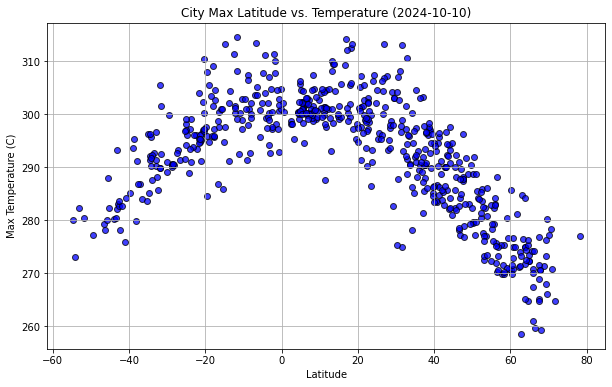

In [55]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-10-10)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

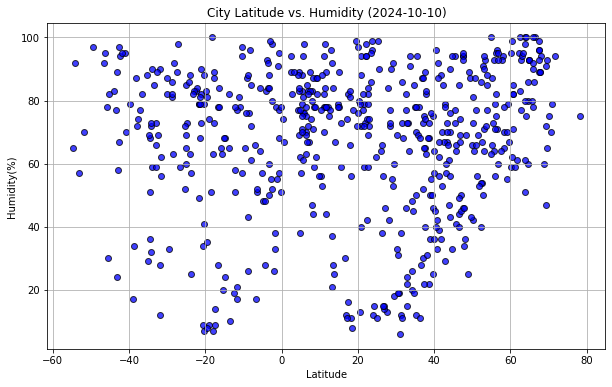

In [56]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-10-10)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

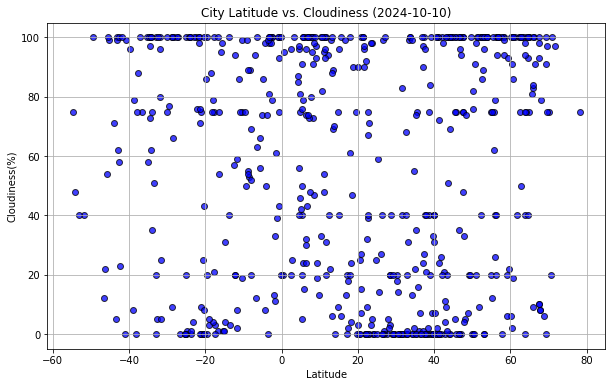

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-10-10)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

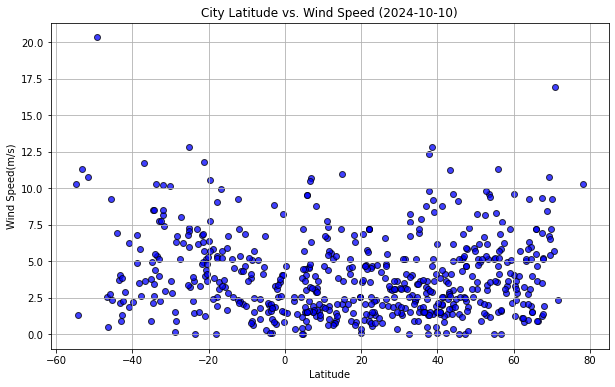

In [58]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-10-10)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Plot
    plt.figure(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()
    
    return slope, intercept, r_value, p_value, 

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ceelbuur,4.6850,46.6176,305.61,38,81,7.21,SO,1728571042
3,petropavlovsk-kamchatsky,53.0452,158.6483,272.48,64,0,3.00,RU,1728571044
4,yellowknife,62.4560,-114.3525,273.94,100,75,2.06,CA,1728571046
6,nar'yan-mar,67.6713,53.0870,270.49,89,8,5.21,RU,1728571050
7,bethel,41.3712,-73.4140,284.76,62,0,2.57,US,1728571052


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,295.89,81,100,10.55,MU,1728571039
1,ushuaia,-54.8000,-68.3000,279.96,65,75,10.29,AR,1728571041
5,banjarmasin,-3.3244,114.5910,300.23,88,98,1.01,ID,1728570808
10,ruyigi,-3.4500,30.3167,294.14,60,81,1.88,BI,1728571056
15,port alfred,-33.5906,26.8910,292.69,85,51,5.36,ZA,1728571062


###  Temperature vs. Latitude Linear Regression Plot

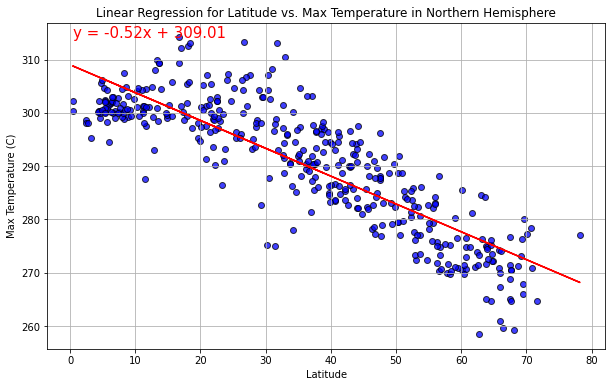

In [47]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (C)', 
    'Linear Regression for Latitude vs. Max Temperature in Northern Hemisphere'
)

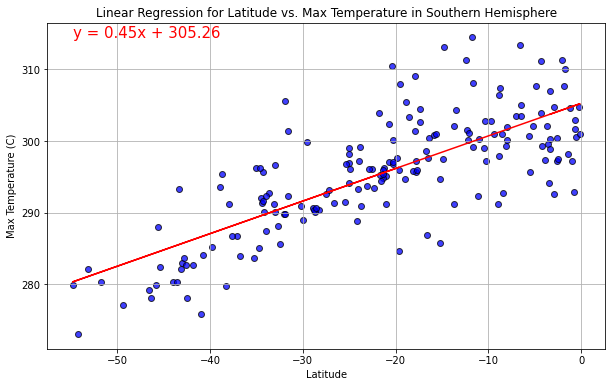

In [48]:
# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (C)', 
    'Linear Regression for Latitude vs. Max Temperature in Southern Hemisphere'
)

**Discussion about the linear relationship:** The correlation of the two plot charts are, the closer you are to the equator, the hotter it is. The linear regression lines are displaying the cities in the northern and southern hemisphere and plotting the maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

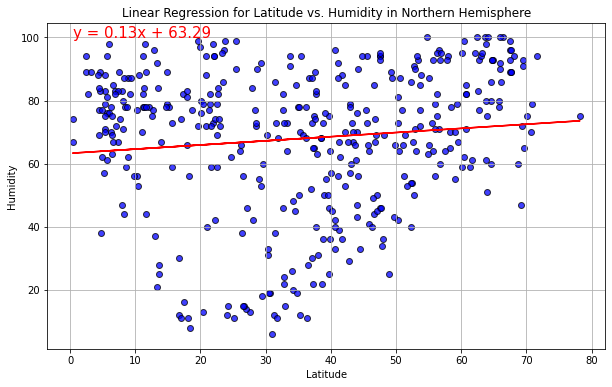

In [49]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 
    'Linear Regression for Latitude vs. Humidity in Northern Hemisphere'
)

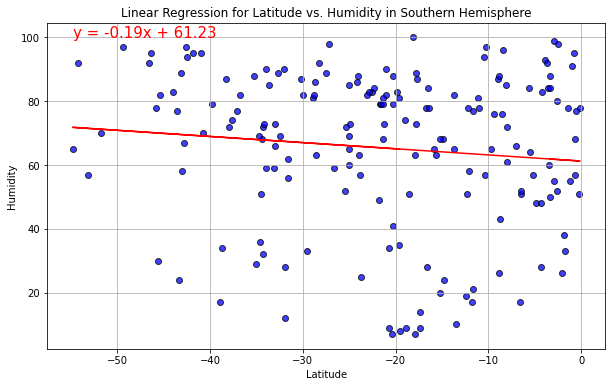

In [50]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', 
    'Linear Regression for Latitude vs. Humidity in Southern Hemisphere'
)

**Discussion about the linear relationship:** There is no correlation although it is interesting to note there is more humidity in the northen hemisphere. I'd like to state while looking at a map, there is more land mass found above the equator, therefore more cities can be located in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

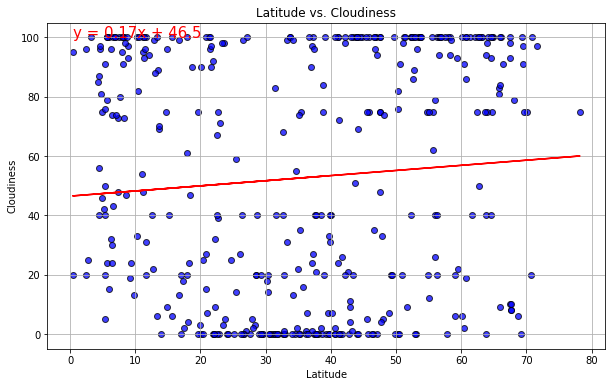

In [51]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 
    'Latitude vs. Cloudiness'
)

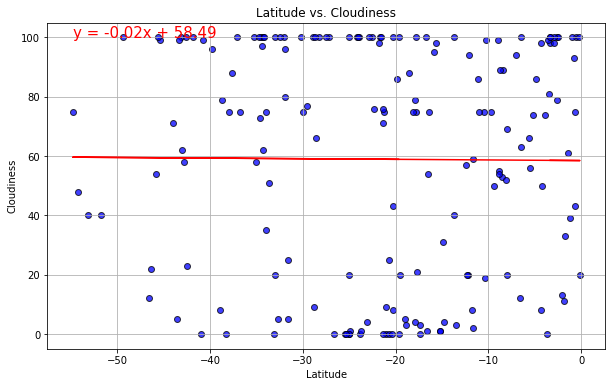

In [52]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 
    'Latitude vs. Cloudiness'
)

**Discussion about the linear relationship:** There is no correlation between the regression lines in the northen and southern plots, yet an observation I've made is there are visibly less cloudiness dots in the center of the equator and the dots are condensed around 100 and 0.

### Wind Speed vs. Latitude Linear Regression Plot

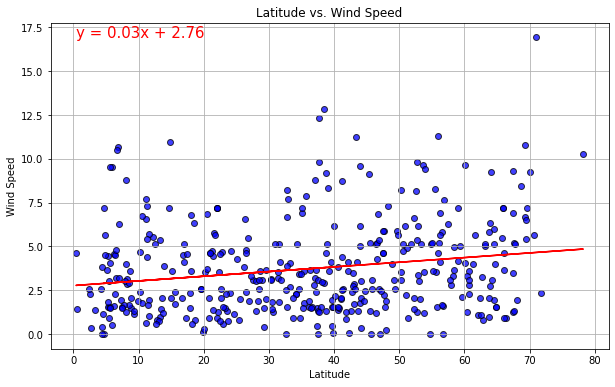

In [53]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 
    'Latitude vs. Wind Speed'
)

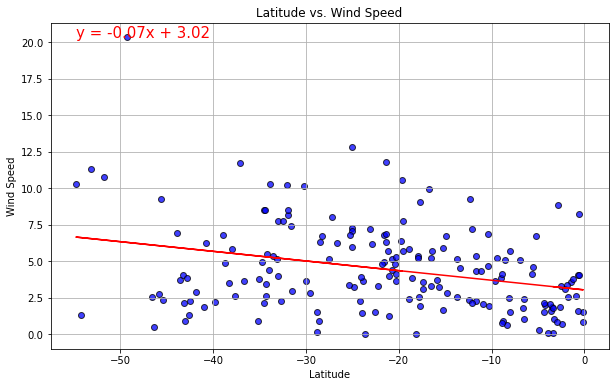

In [54]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 
    'Latitude vs. Wind Speed'
)

**Discussion about the linear relationship:** There is no correlation between northern and southern windspeed, although both charts show an outlier.